In [5]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/0a/e4/300b08e3e08f9c98b0d5635f42edabf2f7a1d634e64cb0318a71a44ff720/matplotlib-3.10.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/67/71/1e6e95aee21a500415f5d2dbf037bf4567529b6a4e986594d7026ec5ae90/contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/81/1f/e67c99aa3c6d3d2f93d956627e62a57ae0d35dc42f26611ea2a91053f6d6/fonttools-4.57.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 5.4 MB/s eta 0:00:00
  Obtaining dependency informat

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

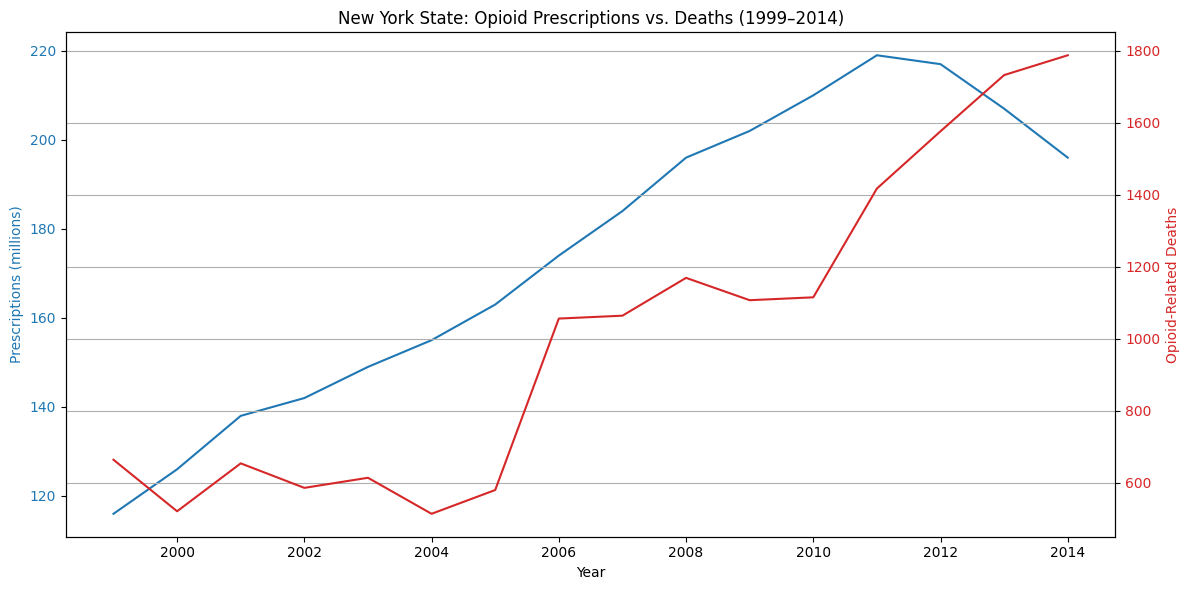

In [8]:
death_df = pd.read_csv('data/Multiple Cause of Death 1999-2014 v1.1.csv')
death_df["Deaths"] = pd.to_numeric(death_df["Deaths"], errors='coerce')
death_df["Prescriptions"] = pd.to_numeric(
    death_df["Prescriptions Dispensed by US Retailers in that year (millions)"], errors='coerce'
)

ny_deaths = death_df[death_df["State"] == "New York"]

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Year")
ax1.set_ylabel("Prescriptions (millions)", color="tab:blue")
ax1.plot(ny_deaths["Year"], ny_deaths["Prescriptions"], label="Prescriptions", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Opioid-Related Deaths", color="tab:red")
ax2.plot(ny_deaths["Year"], ny_deaths["Deaths"], label="Deaths", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("New York State: Opioid Prescriptions vs. Deaths (1999–2014)")
fig.tight_layout()
plt.grid(True)
plt.show()


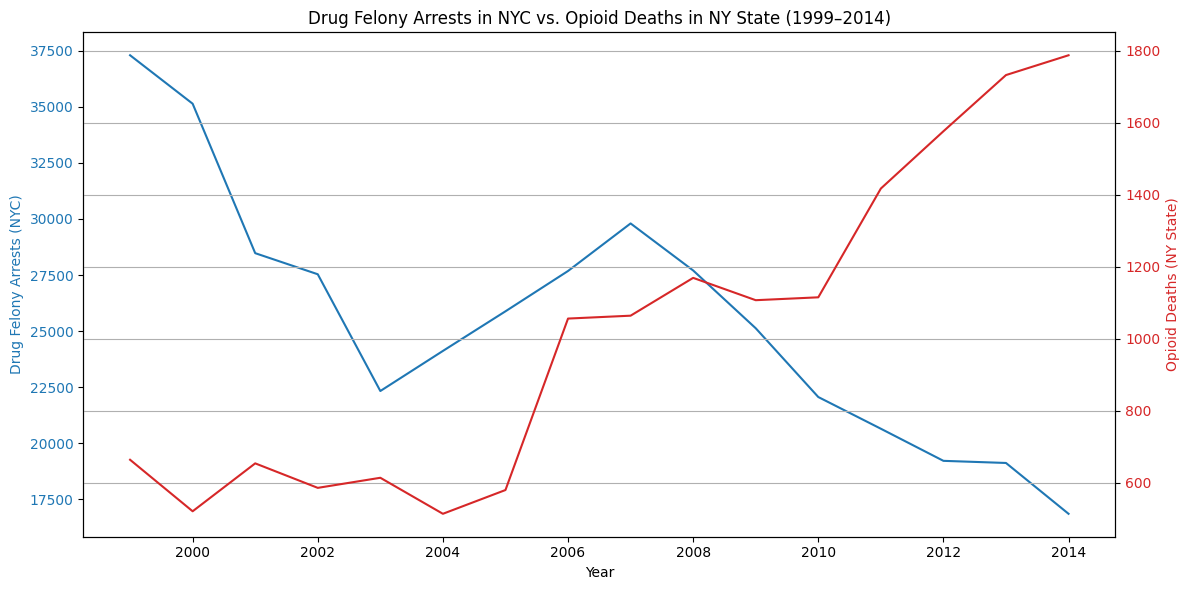

In [9]:
arrest_df = pd.read_csv('data/Adult_Arrests_18_and_Older_by_County___Beginning_1970_20250324.csv')
nyc_counties = ['New York', 'Kings', 'Bronx', 'Queens', 'Richmond']
nyc_drug_arrests = arrest_df[arrest_df['County'].isin(nyc_counties)]
nyc_felony_trend = nyc_drug_arrests.groupby('Year')['Drug Felony'].sum().reset_index()

merged_years = death_df[death_df["State"] == "New York"]
merged_years = merged_years[merged_years["Year"].isin(nyc_felony_trend["Year"])]
merged_df = pd.merge(nyc_felony_trend, merged_years[['Year', 'Deaths']], on='Year')

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Year")
ax1.set_ylabel("Drug Felony Arrests (NYC)", color="tab:blue")
ax1.plot(merged_df["Year"], merged_df["Drug Felony"], label="Felony Arrests", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Opioid Deaths (NY State)", color="tab:red")
ax2.plot(merged_df["Year"], merged_df["Deaths"], label="Opioid Deaths", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Drug Felony Arrests in NYC vs. Opioid Deaths in NY State (1999–2014)")
fig.tight_layout()
plt.grid(True)
plt.show()